# Import CDF lib

In [10]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf
import os
os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"

# Import local lib

In [11]:
import sys

# import JUICE lib
sys.path.append('../lib/')

import juice_cdf_lib as juice_cdf

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Read CDF file

In [13]:
data_dir = 'C:\\Users\\tsuch\VSCode\\python\\juice\\data\\Data-sample-v0.2.0\\'
#cdf_file = data_dir + 'JUICE_L1a_RPWI-HF-SID2_20000101T000459-20000101T000700_V01___HF_20210920-1007.ccs.cdf'
cdf_file = data_dir + 'JUICE_L1a_RPWI-HF-SID2_20230419T135849-20230419T141229_V01___RPR1_52000000_2023.109.16.17.21.607.cdf'
#cdf_file = data_dir + 'JUICE_L1a_RPWI-HF-SID2_20230419T141231-20230419T141402_V01___RPR1_52000001_2023.109.17.51.54.600'
cdf = pycdf.CDF(cdf_file)

get waveform

In [14]:
data = juice_cdf.juice_getdata_hf_sid02(cdf)

get power spectra

In [15]:
spec = juice_cdf.juice_getspec_hf_sid02(data)

# Conversion factor (Raw value @ ADC input to dBm)
cf = -104.1

spec.Eu_power_dBm = 10.0*np.log10(spec.Eu_power) + cf
spec.Ev_power_dBm = 10.0*np.log10(spec.Ev_power) + cf
spec.Ew_power_dBm = 10.0*np.log10(spec.Ew_power) + cf


# Plot raw waveform

<bound method Figure.show of <Figure size 864x864 with 4 Axes>>

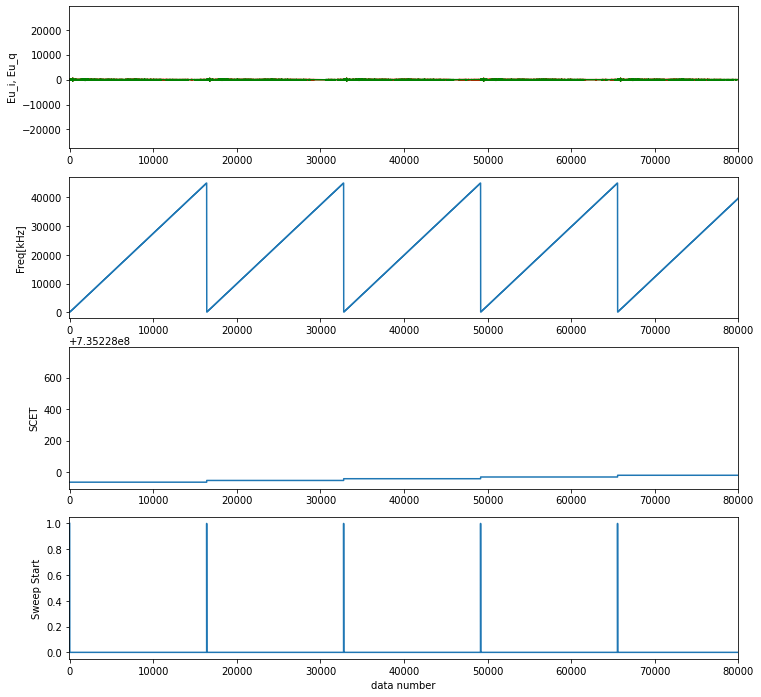

In [16]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
ax1.plot(data.Eu_i, '-r')
ax1.plot(data.Eu_q, '-g')
ax2.plot(data.frequency)
ax3.plot(data.scet)
ax4.plot(data.sweep_start)

ax4.set_xlabel('data number')
ax1.set_ylabel('Eu_i, Eu_q')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('SCET')
ax4.set_ylabel('Sweep Start')

xlim=[-100,80000]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
ax4.set_xlim(xlim)
fig.show

# Plot spectra

Frequency vs. Power

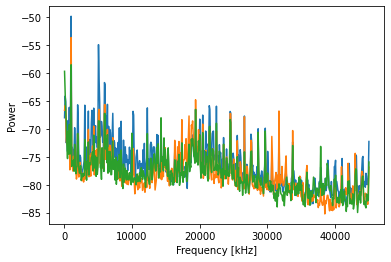

In [17]:
plt.plot(spec.frequency, spec.Eu_power_dBm[:, 0])
plt.plot(spec.frequency, spec.Ev_power_dBm[:, 0])
plt.plot(spec.frequency, spec.Ew_power_dBm[:, 0])

plt.xlabel('Frequency [kHz]')
plt.ylabel('Power [dBm@ADC input]')

plt.show()

ft diagram

Text(0.5, 0, 'Time')

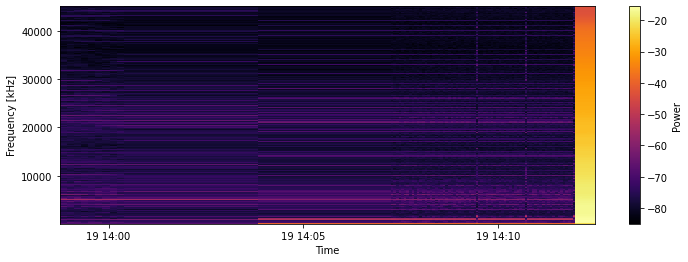

In [18]:
import matplotlib.colors as colors  # import it to display in logscale

fig = plt.figure(figsize=(12, 4))
#mesh = plt.pcolormesh(spec.epoch, spec.frequency,
#                      spec.Eu_power, cmap='inferno', norm=colors.LogNorm())
mesh = plt.pcolormesh(spec.epoch, spec.frequency,
                      spec.Eu_power_dBm, cmap='inferno')
plt.colorbar(mesh, label='Power [dBm@ADC input]')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time')